## Kaggle Challenge - West Nile Virus Prediction

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_context("notebook")
sns.set_style('whitegrid')
sns.despine()
sns.set(font_scale=1.2)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Data Cleaning 

In [2]:
train = pd.read_csv('./west_nile/datasets/train.csv')
weather = pd.read_csv('./west_nile/datasets/weather_CLEAN.csv')
spray = pd.read_csv('./west_nile/datasets/spray.csv')
test = pd.read_csv('./west_nile/datasets/test.csv')
# weather_CLEAN = pd.read_csv('./west_nile/datasets/weather_CLEAN.csv')

In [3]:
weather.drop(labels=['Month', 'Year'], axis=1, inplace=True)

In [4]:
weather.head()

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal
0,0,1,2007-05-01,83,50,66.5,51,56.0,0.0,2.0,0.0
1,1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,0.0
2,2,1,2007-05-02,59,42,50.5,42,47.0,14.0,0.0,0.0
3,3,2,2007-05-02,60,43,51.5,42,47.0,13.0,0.0,0.0
4,4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,0.0


In [5]:
# Classifies each address into weather station 1 and 2.
train['Station'] = train['Latitude'].apply(lambda x: 1 if x>=41.85 else 0) 
test['Station'] = test['Latitude'].apply(lambda x: 1 if x>=41.85 else 0) 

In [6]:
# These functions extract the post codes from the address line.
import re

def splitstring(string):
    return string.split()[-2][:-1]

def digitfilter(string):
    if string.isdigit() == True:
        return int(string)
    else:
        return 0

In [7]:
# Adding postcode as a column for train data
train['Postcode'] = train['Address'].apply(splitstring).astype('int64', errors='ignore') 
train['Postcode'] = train['Postcode'].apply(digitfilter).astype('int64', errors='ignore')

In [8]:
# Converts date columns to datetime
train['Date'] = train['Date'].apply(lambda x: pd.to_datetime(x, yearfirst=True, dayfirst=False)) 
weather['Date'] = weather['Date'].apply(lambda x: pd.to_datetime(x, yearfirst=True, dayfirst=False))
test['Date'] = test['Date'].apply(lambda x: pd.to_datetime(x, yearfirst=True, dayfirst=False))

In [9]:
weather.columns

Index([u'Unnamed: 0', u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg',
       u'DewPoint', u'WetBulb', u'Heat', u'Cool', u'PrecipTotal'],
      dtype='object')

In [10]:
train['Day'] = train['Date'].apply(lambda x: x.day)
train['Month'] = train['Date'].apply(lambda x: x.month)
train['Year'] = train['Date'].apply(lambda x: x.year)

weather['Day_W'] = weather['Date'].apply(lambda x: x.day)
weather['Month_W'] = weather['Date'].apply(lambda x: x.month)
weather['Year_W'] = weather['Date'].apply(lambda x: x.year)

test['Day'] = test['Date'].apply(lambda x: x.day)
test['Month'] = test['Date'].apply(lambda x: x.month)
test['Year'] = test['Date'].apply(lambda x: x.year)

In [11]:
# Changes the Species column into dummy variable columns
train = pd.get_dummies(train, columns=['Species'], drop_first=True)
train_trap = pd.get_dummies(train, columns=['Trap'],drop_first=True)

In [12]:
data = pd.merge(train, weather, on=['Date', 'Station'])
data2 = pd.merge(train_trap, weather, on=['Date', 'Station'])
predict_data = pd.merge(test, weather, on=['Date', 'Station']) # Merges test data with weather data

In [13]:
predict_data.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,Day_W,Month_W,Year_W
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,61,73.5,56,64.0,0.0,9.0,0.0,11,6,2008
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,61,73.5,56,64.0,0.0,9.0,0.0,11,6,2008
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,61,73.5,56,64.0,0.0,9.0,0.0,11,6,2008
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,61,73.5,56,64.0,0.0,9.0,0.0,11,6,2008
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,61,73.5,56,64.0,0.0,9.0,0.0,11,6,2008


In [14]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59805 entries, 0 to 59804
Data columns (total 27 columns):
Id                        59805 non-null int64
Date                      59805 non-null datetime64[ns]
Address                   59805 non-null object
Species                   59805 non-null object
Block                     59805 non-null int64
Street                    59805 non-null object
Trap                      59805 non-null object
AddressNumberAndStreet    59805 non-null object
Latitude                  59805 non-null float64
Longitude                 59805 non-null float64
AddressAccuracy           59805 non-null int64
Station                   59805 non-null int64
Day                       59805 non-null int64
Month                     59805 non-null int64
Year                      59805 non-null int64
Unnamed: 0                59805 non-null int64
Tmax                      59805 non-null int64
Tmin                      59805 non-null int64
Tavg                      5

In [15]:
# weather.info()

In [16]:
data.head()

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,Day_W,Month_W,Year_W
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007


In [17]:
# train.head()

### Feature Selection

In [18]:
from sklearn.feature_selection import RFECV, SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

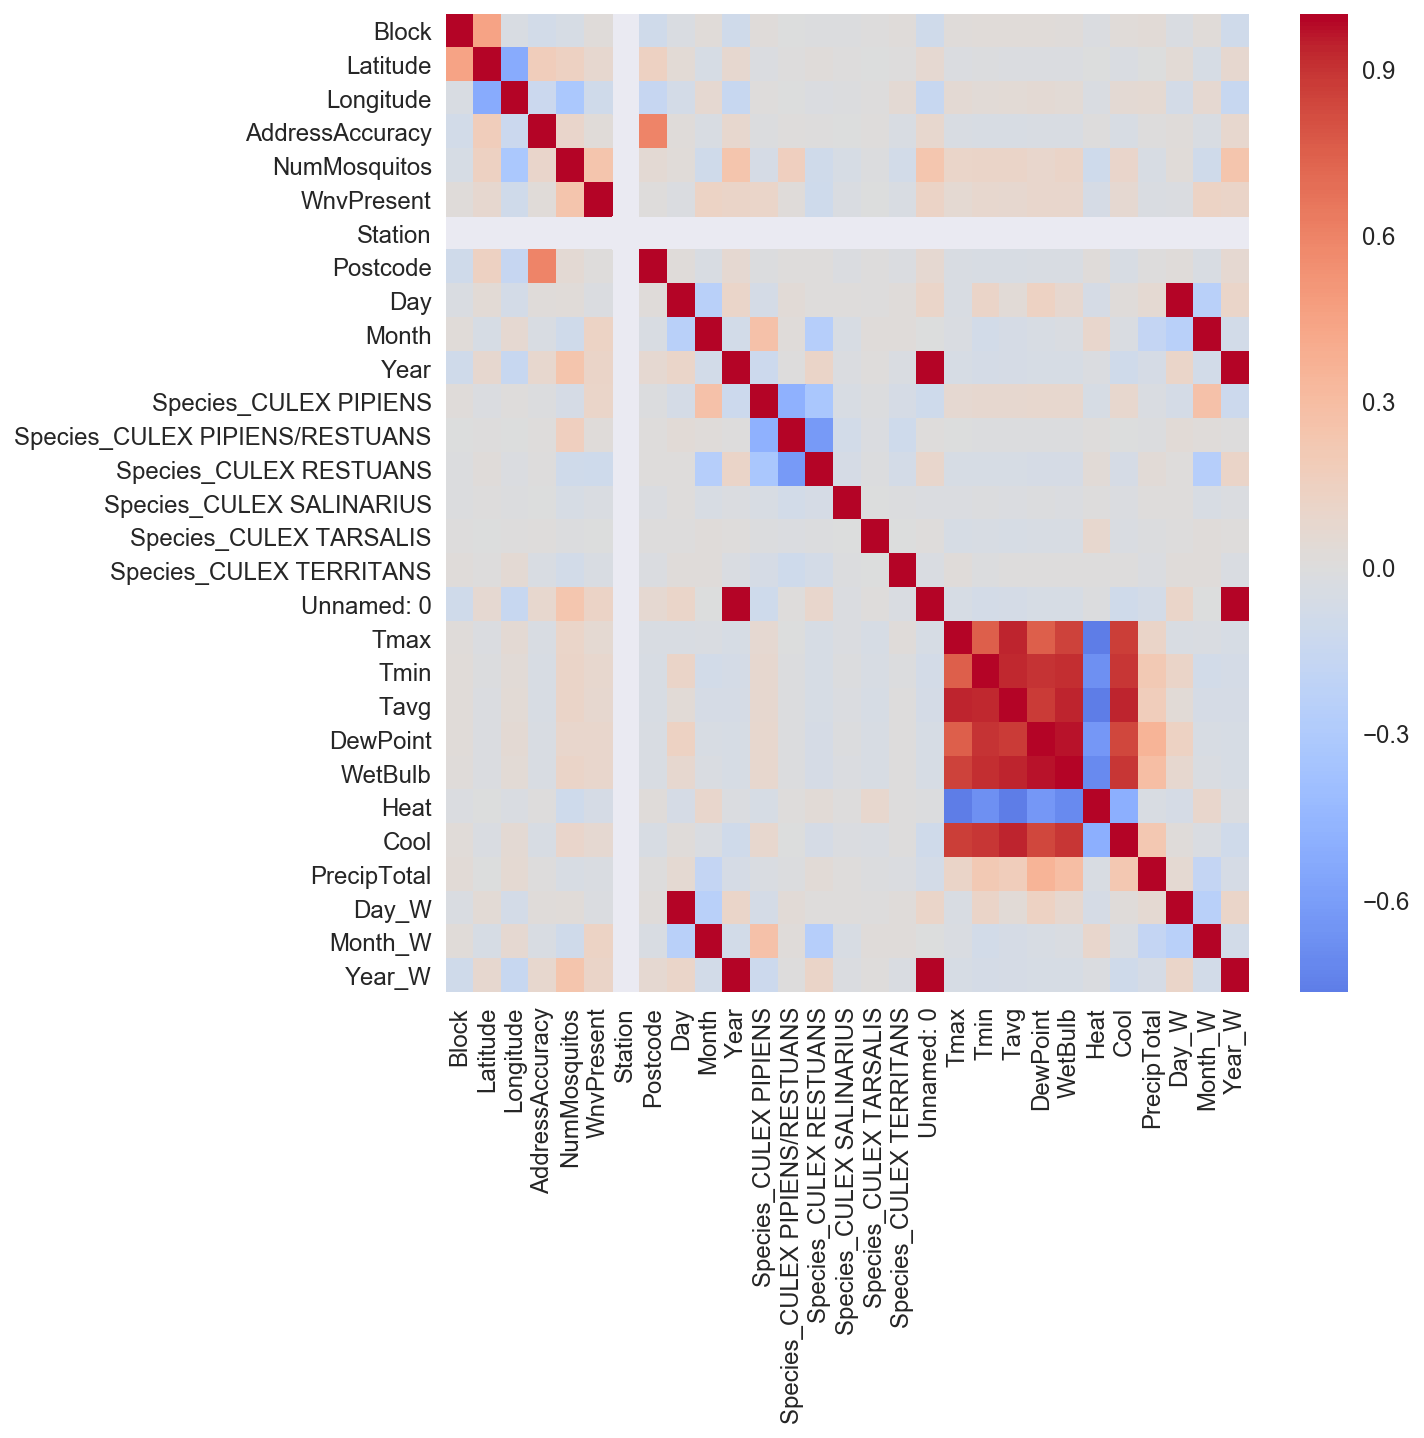

In [19]:
fig, ax = plt.subplots(figsize=(9,9)) 
sns.heatmap(data.corr(), cmap='coolwarm', center=0)

### First model

In [20]:
y = data['WnvPresent'].values
X = data[['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'WetBulb']].values # 'NumMosquitos' is missing

ss = StandardScaler()
Xs = ss.fit_transform(X)

logreg = LogisticRegression()
logreg.fit(Xs, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
score = cross_val_score(logreg, Xs, y, cv=10)
print np.mean(score)

0.9358795577898669


In [22]:
gs_params = {
    'penalty':['l1','l2'], # l1 means Lasso, l2 means grid
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=10, verbose=1, n_jobs=-1)

In [23]:
lr_gridsearch.fit(Xs, y)
lr_gridsearch.best_score_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1019 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    9.4s finished


0.9421866056096165

In [24]:
lr_gridsearch.best_params_

{'C': 1e-05, 'penalty': 'l1', 'solver': 'liblinear'}

### Predicting West Nile virus presence using test data

In [25]:
X_test = predict_data[['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'WetBulb']].values
Xs_test = ss.fit_transform(X_test)

In [26]:
# Instantiating a new logistic regression model with the best parameters from gridsearch
logreg_best = lr_gridsearch.best_estimator_
predict_data['WnvPresent']= logreg_best.predict(Xs_test)

In [27]:
print logreg_best

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [28]:
final = predict_data[['Id', 'WnvPresent']]
final.to_csv('final.csv', sep=',' , index=False)

In [29]:
final.shape


(59805, 2)

### Next Step: We should use linear regression to predict the number of mosquitos in test data (if we had more time)

In [30]:
y_lr = data['NumMosquitos'].values
X_lr = data[['Year', 'Month', 'Day', 'Latitude', 'Longitude']].values # 'NumMosquitos' is missing

lr = LinearRegression()
lr.fit(X_lr, y_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
LRscore = cross_val_score(lr, Xs, y, cv=10)
print np.mean(LRscore)

-0.303114020529198
